# Logitstic Regression


## 범주형 자료 (Categorical data)

<br/>


**범주형 변수**는 측정된 단위가 여러 범주들의 집합으로 구성되어 있는 변수를 의미


정치성향 : "진보","중립","보수"

성별 : "남","여"

프로그래밍 언어 : "C", "Python", "Java" ...  

혹은 단순한 유무, 예/아니요 와 같은 경우도 범주형이다.

코로나 검사 유뮤 : "예", "아니요"

우리는 종속변수 Y를 독립변수 X로 설명하는 회귀분석을 합니다.

그중 로지스틱 회귀분석은 종속변수 Y가 __범주형 자료__ 인 경우에 실행하는 분석입니다.


In [1]:
politics = ['R','N','C']
sex = ['M','F']
p_language = ['C','Python','Java']
test = ['yes','no']

### 참고 : 범주형 자료의 확률분포

#### ※통계학과 주의

그동안 해왔던 연속형 자료들은 정규분포를 이룬다고 했습니다.

범주형 자료는 __다항분포__ 를 따르고 있습니다.

['성공','실패'] 나 ['예','아니오'] 와 같은 __두개__ 의 가능한 결과만 갖는 경우에는 이항분포

그 외에 __n개__ 의 항목을 가지고 있으면 N항분포

물론 __중심극한정리__ (빠질수 없죠)와 __대수의 법칙__ 을 이용하는 대표본분포는 근사적으로 __정규분포__ 에 따릅니다.

<br/>

<br/>

### 참고 : 오즈(odds)와 오즈비(odds ratio)

#### ※통계학과 주의

성공, 실패 두가지만 있는 경우에 성공할 확률을 p 라고 하면 __오즈(odds)__ 는 다음과 같이 정의됩니다

odds = p / (1-p) = 성공할 확률 / 실패할 확률

예를들어  p = 0.8이면, odds = 0.8/0.2 = 4

오즈는 음이 아닌 실수이고, 성공이 실패보다 일어날 가능성이 많을 때는 1보다 큰 값을 갖습니다.

오즈 4라는 것은 성공확률이 실패확률의 4배라는 뜻입니다. (오즈값을 알면 반대로 성공확률도 구할 수 있겠죠?)

오즈비(odds ratio)는 두 오즈의 비율입니다.

odds_1 = p_1 / (1-p_1)

odds_2 = p_2 / (1-p_2)

odds_ratio = odds_1/odds_2 = {p_1 / (1-p_1)}/{p_2 / (1-p_2)}

나중에 범주형 자료분석하면 갑자기 튀어나오는거라 이름만 익혀두세요

오즈값이 0.2면 성공확률은?

In [2]:
def odds(p):
    return p/(1-p)

In [3]:
p = 0.8
odds(p)

4.000000000000001

In [4]:
q = 0.75
odds(q)

3.0

In [5]:
odds(p) / odds(q)

1.3333333333333337

## 연결함수 (Link Fuction)

<br/>

**그렇다면 로지스틱 회귀분석은 단순하게, 종속변수 Y에 범주형 자료를 넣고 회귀분석을 돌리면 되는걸까요?**



### 선형확률모형

In [6]:
import pandas as pd
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
d = data[['Survived','Age','Fare']]
d.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
y = d['Survived']
X = d[['Age','Fare']]

In [9]:
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(X, y)

y_predicted = line_fitter.predict(X)

In [10]:
y_predicted[y_predicted >1]

array([1.02289146, 1.00870737, 1.61531061, 1.02481023, 1.00516134,
       1.61176459, 1.61531061, 1.01417216])

1 : 생존 , 0 : 사망인데 1이 넘어가는 수치가 어떤 의미가 있을까요?

범주형 자료는 다항분포를 따른다고 했듯이, 사실 우리가 구하고 싶은것은 확률모형입니다.

방금 구한 것은 __항등 연결 함수__ 를 이용한 __선형 확률 모형__ 입니다.

$$ y = \alpha + \beta x $$ 


이 모형은 아주 단순하고 구하기 쉽지만 구조적인 단점이 있습니다.

확률은 0,1 사이의 값을 가지만, 선형함수는 실수 전체에 걸쳐 값을 가질 수 있기 때문에 제한된 x의 범위에서만 타당하게 됩니다.

연결함수를 다른 비선형 식으로 표현할 수 있습니다. (Transformation)

y값이 음수가 나오지 않게 하기 위해서 사용하는 __로그 연결 함수__ 는

$$ log(y) = \alpha + \beta x $$




그리고 우리가 하려는 로지스틱 회귀분석에서 사용되는 __로짓 연결함수__ 는

$$log[y/(1-y)]= \alpha + \beta x$$

우리가 회귀분석을 돌리는데, 종속변수 Y가 범주형 자료라면, 로짓 연결함수를 이용 (로지스틱 모양으로 변형) 후 회귀분석을 한다고 생각하시면 됩니다.

위 식을 y = f(x)의 모양으로 변형을 하게 되면


$$f(x) = {exp(\alpha + \beta x)\over 1+exp(\alpha + \beta x)} $$


또는 
$$f(x) = {e^{\alpha + \beta x} \over 1+e^{\alpha + \beta x} }$$


※ 지금 굉장히 통계학스럽게 해서 재미없고 이게 뭔가 싶을 수 있습니다. 사실 이 내용을 머신러닝 이론에서는

"로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수(Sigmoid func)" 이라고 하고 그냥 넘어가는 내용인데 통계학도는... 여기를 그렇게 무사히 넘어갈 수 없습니다^^


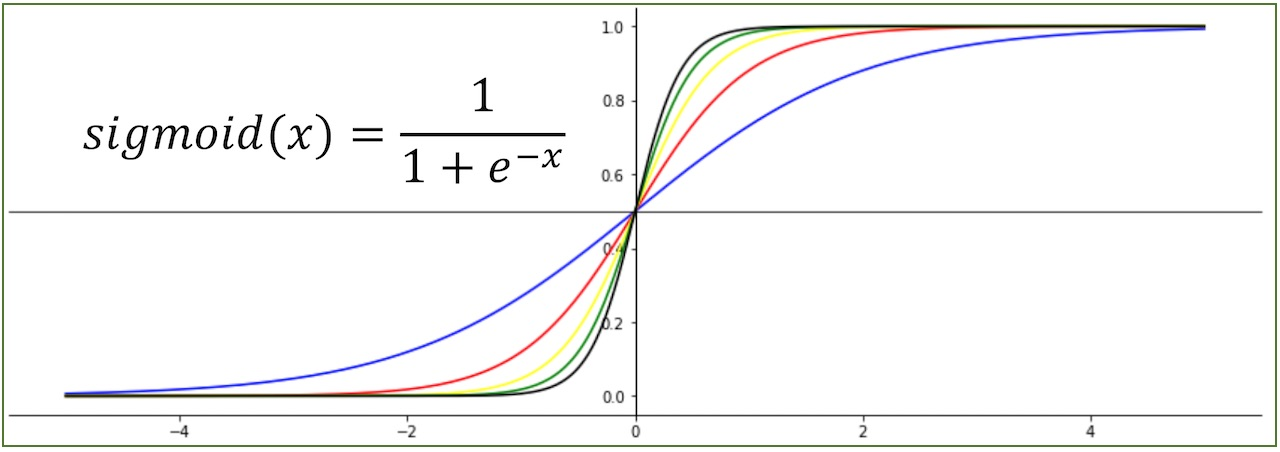

더 자세한 내용은 4-1 "범주형 자료분석"에서.... 



# 코딩합시다


<핸즈 온 머신러닝> 회귀분석 부분을 참고하여 작성하였습니다. 이 부분에 대해서 모르는 것이 있다면 책을 참고해 보시는것도 좋을 것 같습니다.

In [11]:
# sklearn 없으면 다운 받으세요
#!pip install -U scikit-learn

## 정규방정식

$$\beta =  (X^T X)^{-1} X^T y $$

In [12]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

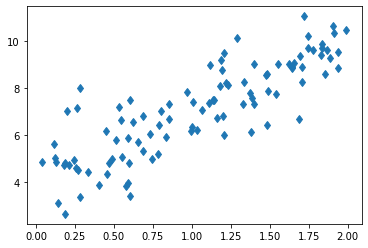

In [13]:
plt.plot(X,y,'d')

In [14]:
X_b =np.c_[np.ones((100,1)),X]

In [15]:
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
beta_hat

array([[4.08963451],
       [2.9025897 ]])

In [17]:
X_new = np.array([[1,0],[1,2]])

In [18]:
y_predict = X_new.dot(beta_hat)
y_predict

array([[4.08963451],
       [9.89481392]])

[0, 2, 0, 15]

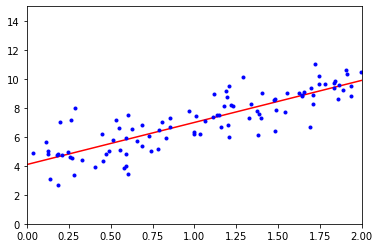

In [19]:
plt.plot(np.array([[0],[2]]),y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08963451]), array([[2.9025897]]))

In [23]:
lin_reg.predict([[0],[2]])

array([[4.08963451],
       [9.89481392]])

## 경사하강법 (Gradient Descent)

정규방정식을 이용해서 $\beta$ 값을 구한다면 (n+1) x (n+1)을 계산하게 되는데. 실제 머신러닝에서 데이터의 개수 및 특성의 개수는 너무나도 크기 때문에 시간이 오래걸려 비효율 적일 수 있습니다.

그렇기 때문에 실제값과 예측값의 차이가 점점 작아지는 방향으로 조금씩 이동하는 방법이 __경사하강법__ 입니다.

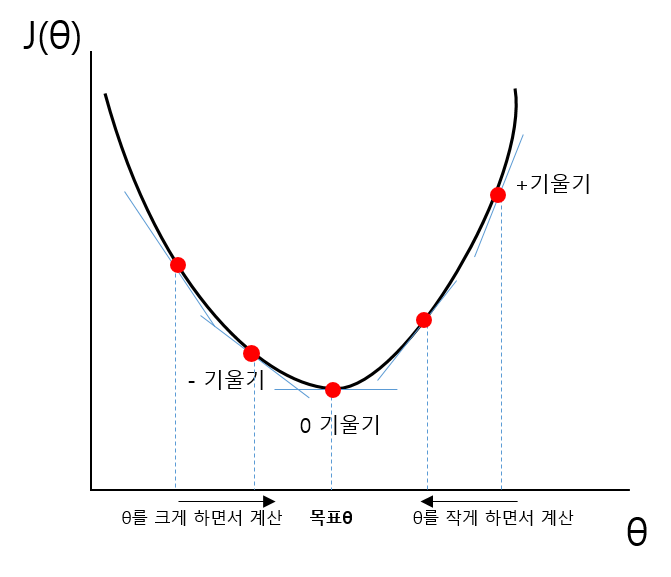



회귀분석에서 $\beta$ 값, 머신러닝에서는 가중치(weights)값을 처음에는 임의의 값을 주고, MSE가 줄어드는 방향(비용 또는 오차로 이해하시면 편합니다) 이동하여 최소값을 향게 점진적으로 이동하는 기법입니다.

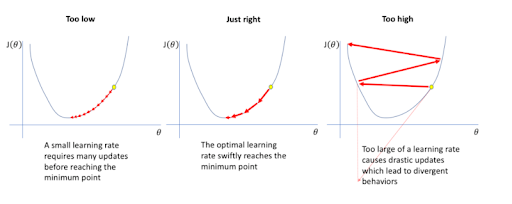

$\beta$값을 계속해서 수정해 나가는데, 한번 수정할때 얼만큼 수정하는지 결정하는게 __학습률 (learning rate)__ 

- 너무 작으면 학습이 오래걸리고

- 너무 크면 학습에 방해가 됩니다.


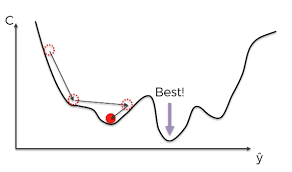

하지만 초기값이 랜덤이라서 시작점에 따라서 도달할 곳도 랜덤입니다.

개념만 찍먹 하시고 나중에 Neural Network 할때 자세히 알려주실겁니다!

## 로지스틱 회귀

로지스틱 회귀는 보통 분류(classification)에서 가장 많이 사용합니다. 어떤 샘플이 특정 클래스에 속할 확률을 추정하는 것으로, 추정 확률이 50%가 넘으면 그 샘플이 해당 클래스에 속한다고 판단합니다.



In [24]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [25]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
X = iris['data'][:,3:]

In [39]:
y = (iris['target'] ==2).astype(np.int)

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [43]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

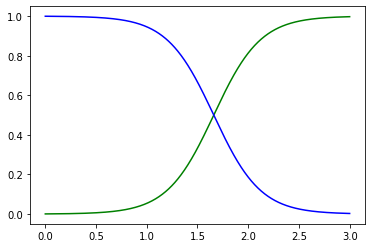

In [47]:
plt.plot(X_new, y_proba[:,1],'g-',label = "Iris Virginica")
plt.plot(X_new, y_proba[:,0],'b-',label = 'Iris Virginica 아님')

실제 Virginica의 꽃 넓이는 1.4 ~ 2.5cm에 분포하고, 다른 붓꽃은 0.1~1.8에 분포합니다. 

In [48]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])